In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.cluster import KMeans

In [62]:
df = pd.read_csv('heart.csv')

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [64]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Feature Selection

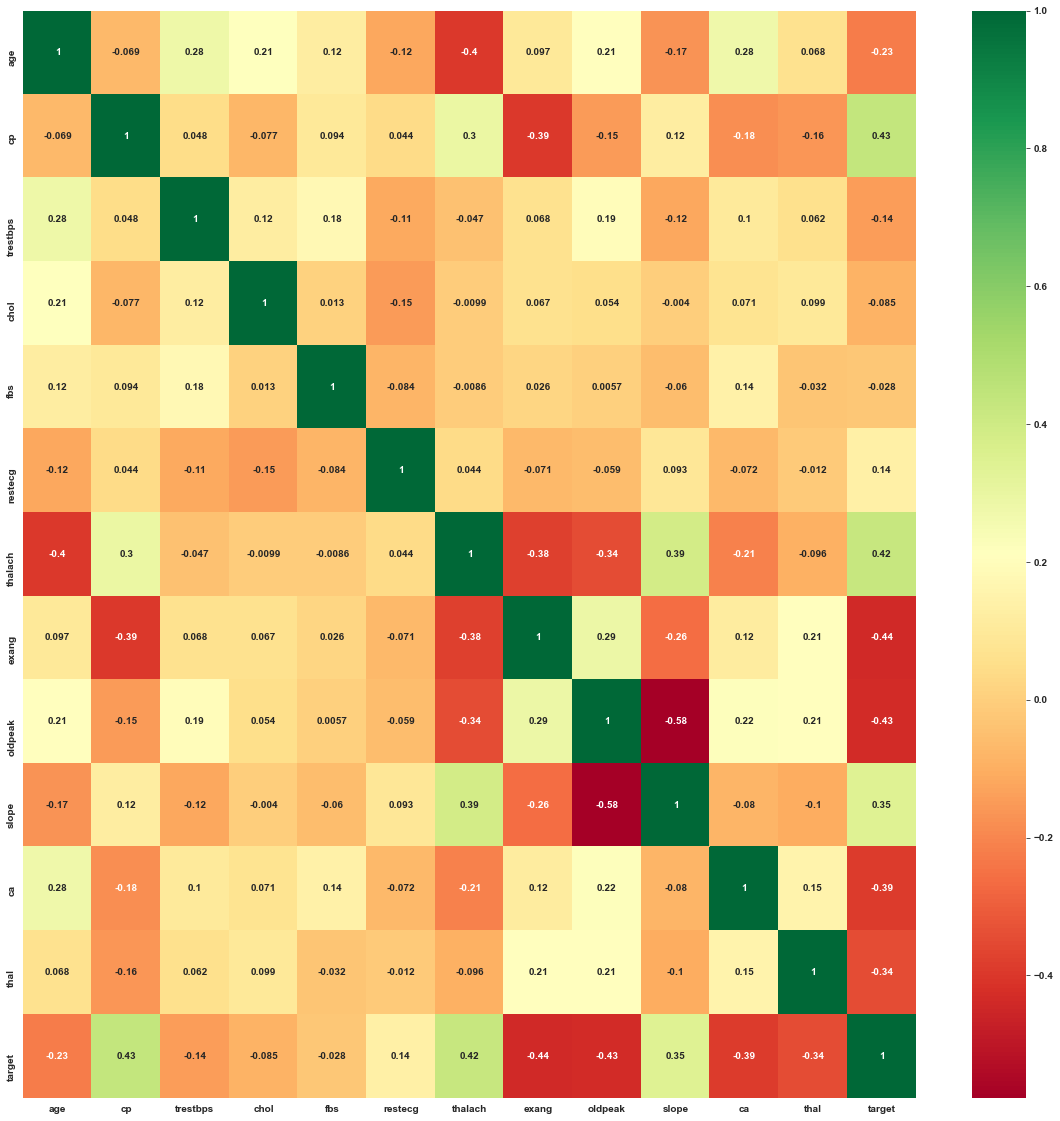

In [65]:
import seaborn as sns
#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

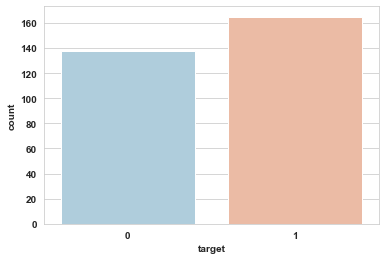

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

# Data Processing

In [67]:
# In data processing, the categorical values are converted to dummy variables and scale all the values before training the machine leraning models.

In [68]:
dataset = pd.get_dummies(df,columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [70]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_F,sex_M,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [71]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)


In [72]:
#Knn

In [73]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train, y_train)
    knn_scores.append(knn_classifier.score(x_test, y_test))

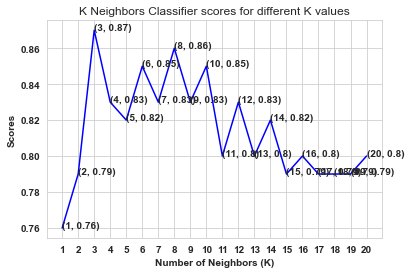

In [74]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [75]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


0.87
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.88      0.87      0.87        52

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100



In [77]:
#kmean

In [78]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


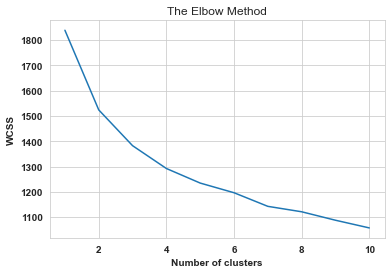

In [79]:
# Plot the graph to visualize the Elbow Method to find the optimal number of cluster  
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [80]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters=2)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [81]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

0.8
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        48
           1       0.77      0.88      0.82        52

    accuracy                           0.80       100
   macro avg       0.81      0.80      0.80       100
weighted avg       0.81      0.80      0.80       100



In [82]:
#randomforest

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=600)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [84]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.82        48
           1       0.82      0.87      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100

0.83


In [85]:
#logisticRegression

In [86]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression(solver='lbfgs',max_iter=1000)
model.fit(x_train,y_train)

y_pred =model.predict(x_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [87]:

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
acc =confusion_matrix(y_test,y_pred)
print(acc)

0.84
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.85      0.85      0.85        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

[[40  8]
 [ 8 44]]


In [88]:
#results of the model
print('Results of the model......')
print('\nIntercept\t: ',model.intercept_)
print('Coefficients\t: ',model.coef_)

Results of the model......

Intercept	:  [-0.25742856]
Coefficients	:  [[ 0.2584849  -0.34109079 -0.28539661  0.57939667 -0.47101155  0.7698977
  -0.77001308 -0.98306104 -0.01428006  0.63305194  0.36417378  0.1601797
  -0.16029508 -0.00166314  0.13549497 -0.13394721  0.28129023 -0.28140561
  -0.03391425 -0.32672993  0.3605288   1.38419622 -0.53532318 -0.69132391
  -0.78951304  0.63184853 -0.20541267  0.29906744  0.70097625 -0.7947464 ]]


In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

train_mse = {'lin_reg':mse(y_train,model.predict(x_train))} 
test_mse = {'lin_reg':mse(y_test,y_pred)} 
print("Training MSE : {:.7f}".format(train_mse['lin_reg'])) 
print("Generalisation Error: {:.7f}".format(test_mse['lin_reg'])) 

Training MSE : 0.1133005
Generalisation Error: 0.1600000


In [ ]:
#naivebayes

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [92]:
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [93]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy


80.0

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.78      0.87      0.82        52

    accuracy                           0.80       100
   macro avg       0.80      0.80      0.80       100
weighted avg       0.80      0.80      0.80       100



In [ ]:
#linearreg

In [97]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [98]:
#results of the model
print('Results of the model......')
print('\nIntercept\t: ',lm.intercept_)
print('Coefficients\t: ',lm.coef_)

Results of the model......

Intercept	:  0.43781632217234456
Coefficients	:  [ 0.04473099 -0.04411316 -0.02434345  0.04831739 -0.04691057  0.08835941
 -0.08835941 -0.14528089  0.02561531  0.05332712  0.06633847  0.03647081
 -0.03647081  0.03991828  0.04789873 -0.08781701  0.03964102 -0.03964102
  0.00465568 -0.05712195  0.05246627  0.16351042 -0.11443837 -0.13770688
 -0.18990403  0.27853886 -0.10585945  0.03725653  0.16057772 -0.0919748 ]


In [99]:
y_pred = lm.predict(x_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred)
print('\nMean squared error\t: %.2f' % mse1)
print('Root mean squared error\t: %.2f' % np.sqrt(mse1))



Mean squared error	: 0.13
Root mean squared error	: 0.36


In [102]:
print('\nCoefficients of determination\t: %.2f' % r2_score(y_test, y_pred))



Coefficients of determination	: 0.49


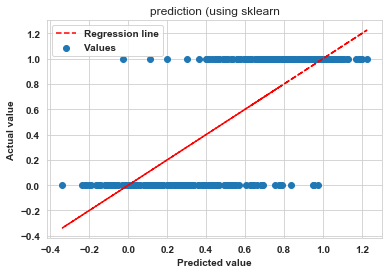

In [103]:
#plotting graph
plt.plot((lm.predict(x).reshape(-1,1)).flatten(),
            (lm.predict(x).reshape(-1,1)).flatten(),
            '--',color = 'red',label = 'Regression line')
plt.scatter((lm.predict(x).reshape(-1,1)).flatten(),y,label = 'Values')
plt.title('prediction (using sklearn')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.legend()
plt.show()

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)
lin=LinearRegression()
lin.fit(x_poly,y)